In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

plt.style.use('seaborn')

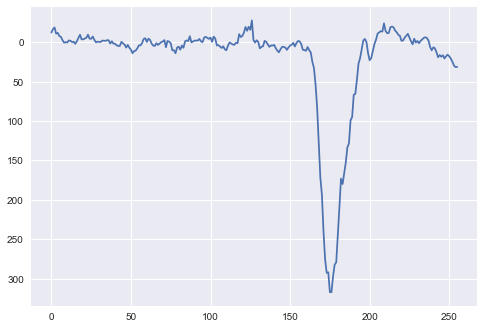

In [3]:
data, ped = load_data('data/test2.acdc.dat', 50)
# plot_event(data, 2, ped, 5)
t = np.arange(0, 256)
y = 20 * np.sin(2*np.pi / 105 *( t +22)) + 0
# plt.plot(t, y)
plt.plot(data[2+1, 5] - ped[2+1] - y)
plt.gca().invert_yaxis()

In [148]:
def load_data(filename):
    PSEC_CELLS = 256
    N_COLS = 32
    N_CHLS = 30
    
    raw = np.genfromtxt(filename)[:, 1:]
    n_events = int(len(raw) / PSEC_CELLS - 1)
    n_boards = int(len(raw.T) / N_COLS)

    indices = [range(n_boards), range(n_events), range(PSEC_CELLS)]
    ch_names = ['{:d}'.format(n+1) for n in range(N_CHLS)]
    cols = ['Wrap', *ch_names, 'Meta']
    data = pd.DataFrame(index=pd.MultiIndex.from_product(indices, names=['Board', 'Event','Sample']), columns=cols)
    
    boards = np.array([raw.T[N_COLS * n:N_COLS * (n+1)] for n in range(n_boards)])
    for b, board in enumerate(boards):
        data.loc[b] = board[:, PSEC_CELLS:].T
        data.loc[b, ch_names] = data.loc[b, ch_names].values - np.tile(board[1:-1, :PSEC_CELLS], n_events).T

    return data

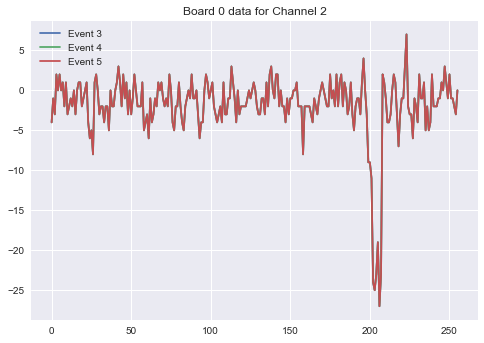

In [152]:
data = load_data('data/two_boards.acdc.dat')       

plt.title('Board 0 data for Channel 2')
[plt.plot(data['2'].loc[0, n], label='Event {}'.format(n)) for n in range(3, 6)]
plt.legend()

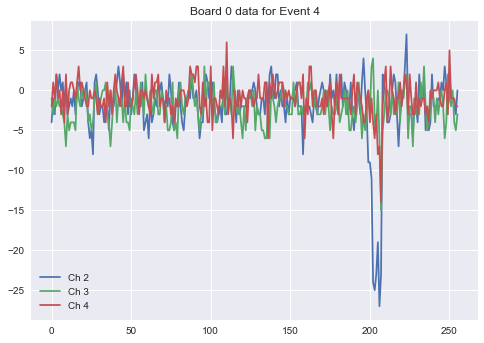

In [153]:
plt.title('Board 0 data for Event 4')
[plt.plot(data[ch].loc[0, 4], label='Ch {}'.format(ch)) for ch in ['2','3', '4']]
plt.legend()

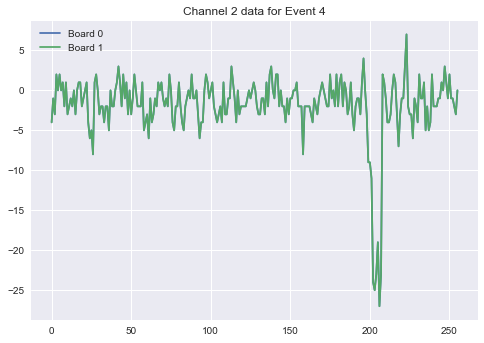

In [154]:
plt.title('Channel 2 data for Event 4')
[plt.plot(data['2'].loc[b, 4], label='Board {}'.format(b)) for b in range(2)]
plt.legend()